# Data cleaning
Data cleaning is an important process in any machine learning project, because most times, there are anomalies in the raw data that will be used in the project. These anomalies tend to 

In [1]:
# Import a few packages that are essential for this process
%matplotlib inline
import numpy
import cv2
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\test_data\mo1.jpg")
image.shape

(810, 540, 3)

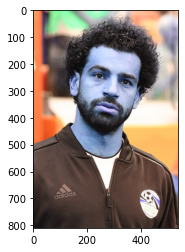

In [3]:
plt.imshow(image)

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image.shape

(810, 540)

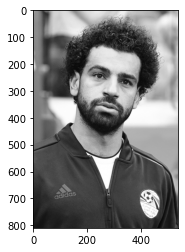

In [5]:
plt.imshow(gray_image, cmap="gray")

In [6]:
detect_face = cv2.CascadeClassifier(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\opencv\haarcascade_frontalface_default.xml")
detect_eye = cv2.CascadeClassifier(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\opencv\haarcascade_eye.xml")

face = detect_face.detectMultiScale(gray_image, 1.3, 5)
face

array([[146, 139, 289, 289]])

In [7]:
(x, y, w, h) = face[0]

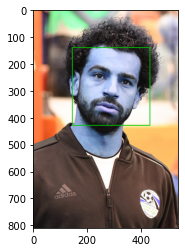

In [8]:
face_outline = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 200, 0), 2)
plt.imshow(face_outline)

In [9]:
cv2.destroyAllWindows()

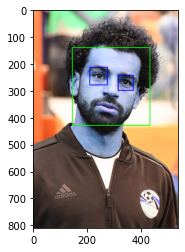

In [10]:
for (x, y, w, h) in face:
    face_outline = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    region_gray = gray_image[y:y+h, x:x+w]
    region_colour = face_outline[y:y+h, x:x+w]
    eyes = detect_eye.detectMultiScale(region_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(region_colour, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)
        
plt.figure()
plt.imshow(face_outline)
plt.show()

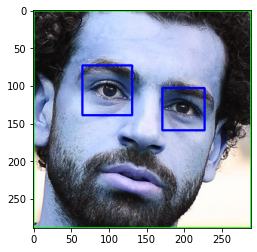

In [11]:
plt.imshow(region_colour)

In [12]:
def get_clean_image(path):
    image= cv2.imread(path)
    if image is not None:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        face = detect_face.detectMultiScale(gray_image, 1.3, 5)
        for (x, y, w, h) in face:
            region_gray = gray_image[y:y+h, x:x+w]
            region_colour = image[y:y+h, x:x+w]
            eyes = detect_eye.detectMultiScale(region_gray)
            if len(eyes) >= 2:
                return region_colour

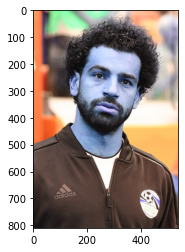

In [13]:
initial_image = cv2.imread(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\test_data\mo1.jpg")
plt.imshow(initial_image)

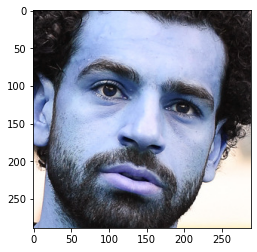

In [15]:
clean_image = get_clean_image(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\test_data\mo1.jpg")
plt.imshow(clean_image)

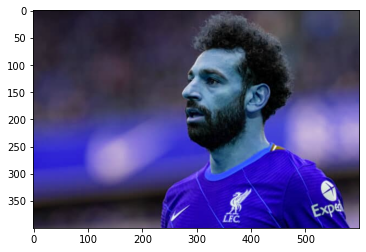

In [16]:
initial_image2 = cv2.imread(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\test_data\mo2.jpg")
plt.imshow(initial_image2)

In [18]:
clean_image2 = get_clean_image(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\test_data\mo2.jpg")
clean_image2

In [19]:
dataset_path = r"C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/"
clean_dataset_path = r"C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/"

In [20]:
import os
sub_dirs = []
for entry in os.scandir(dataset_path):
    if entry.is_dir():
        sub_dirs.append(entry.path)

In [21]:
sub_dirs

['C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/cristiano_ronaldo',
 'C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/karim_benzema',
 'C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/leo_messi',
 'C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/mohamed_salah',
 'C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/robert_lewandoski',
 'C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/zlatan_ibrahimovic']

In [22]:
import shutil

if os.path.exists(clean_dataset_path):
    shutil.rmtree(clean_dataset_path)
os.makedirs(clean_dataset_path)

In [24]:
clean_image_dirs = []
footballer_filenames_dict = {}

for sub_dir in sub_dirs:
    count = 1
    footballer_name = sub_dir.split("/")[-1]
    print(footballer_name)
    
    footballer_filenames_dict[footballer_name] = []
    
    for entry in os.scandir(sub_dir):
        region_colour = get_clean_image(entry.path)
        if region_colour is not None:
            clean_image_dir = clean_dataset_path + footballer_name
            if not os.path.exists(clean_image_dir):
                os.makedirs(clean_image_dir)
                clean_image_dirs.append(clean_image_dir)
                print(f"Processing clean images in: {clean_image_dir} \n")
            clean_image_filename = footballer_name + str(count) + ".png"
            clean_image_path = clean_image_dir + "/" + clean_image_filename
            
            cv2.imwrite(clean_image_path, region_colour)
            footballer_filenames_dict[footballer_name].append(clean_image_path)
            count += 1

cristiano_ronaldo
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/cristiano_ronaldo 

karim_benzema
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/karim_benzema 

leo_messi
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/leo_messi 

mohamed_salah
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/mohamed_salah 

robert_lewandoski
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/robert_lewandoski 

zlatan_ibrahimovic
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/zlatan_ibrahimovic 

